In [3]:
import numpy as np
import csv
import math
import pandas as pd
from sklearn import preprocessing
from sklearn import datasets
from sklearn import cluster
import matplotlib.pyplot as plt
import itertools

In [4]:
user_history = pd.read_csv("user_history.csv")
user_history_without_user_ID = user_history.drop(['USER ID'],axis=1)
user_ratings = pd.read_csv("user_ratings.csv")

In [5]:
user_history_without_user_ID

,nectar prague,joshua sleep,gallery fiesta,jerome jazz,motif polo,zigzag germany,susan sonar,alamo group,gilbert chicken,history private,...,pandora oval,cabinet state,cecilia raja,memo darwin,enigma recycle,olivia image,world blonde,begin unit,rodeo santana,drum spring
0,1.484013,0.257857,0.239617,1.133965,0.599283,2.001566,2.007976,1.129472,4.337007,3.388465,...,0.489561,0.059119,2.177327,0.063949,1.579579,1.977560,0.009971,0.869408,0.676175,0.977309
1,1.350588,0.397670,0.308198,0.660640,0.900114,1.482669,2.052944,1.052420,3.597033,2.799935,...,0.098677,0.201854,1.980738,0.078014,1.692670,2.330878,0.333127,0.942450,0.837264,1.031710
2,2.576723,1.098803,1.764609,0.157183,0.826298,0.094709,4.495690,0.733354,1.453999,0.809408,...,2.000441,0.541809,0.045513,2.939113,0.349863,2.440363,2.199525,1.035054,1.466515,0.173144
3,2.307185,0.236830,0.318632,0.594718,0.940251,1.296865,2.451781,1.386342,3.503421,3.563688,...,0.037346,0.004922,1.729340,0.302608,1.960916,2.513448,0.776575,0.367702,0.869511,1.108934
4,0.526058,2.419744,0.548373,0.109904,1.261197,5.836276,0.204255,2.655214,0.056144,0.617814,...,0.553128,1.847459,1.882823,2.214928,1.869845,2.168439,1.388244,0.081731,0.402835,0.708239
5,1.022697,0.337878,0.364419,1.780540,0.376503,1.884796,1.288596,0.196878,3.746318,1.869156,...,1.259359,0.370162,2.458102,0.373636,1.344079,2.029092,0.149894,0.910913,0.755582,0.708137
6,2.856677,1.122945,1.867636,0.167453,0.654047,0.720790,4.230481,0.835277,1.178175,0.628766,...,2.577786,0.440721,0.438382,3.189517,1.113184,1.776648,1.978874,0.744761,1.254180,0.424063
7,1.483582,4.217846,1.229463,2.256226,2.768330,4.851527,0.412439,0.352141,1.830136,2.560953,...,1.681524,1.967311,4.164025,1.766056,0.668294,1.600152,1.803167,0.010263,0.926644,0.636704
8,2.208917,0.175096,0.466090,1.790422,0.549158,1.073853,1.460456,0.532191,3.438821,2.685225,...,0.624525,0.242650,2.485291,0.527187,1.476299,2.186176,0.566181,1.143914,0.914012,1.247935
9,2.063558,0.275885,0.025109,0.270573,1.610774,1.574283,2.109203,1.616352,3.490566,3.672162,...,0.198147,0.144789,1.897490,0.294849,2.260956,2.565902,0.705275,0.917353,1.039451,1.292006


In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X = user_history.drop(['USER ID'],axis=1).to_numpy()
pca.fit(X)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)
X_pca = pca.fit_transform(X)
user_history_pca = pd.DataFrame(X_pca, columns = ['pc1', 'pc2', 'pc3'])
# user_history_pca['USER ID'] = user_history['USER ID']
user_history_pca

[0.42042748 0.35657495 0.03605765]
[420.13734218 386.91997735 123.03946843]


,pc1,pc2,pc3
0,-1.176094,8.606512,-1.330745
1,-1.002622,8.207177,-1.497481
2,8.306293,-3.333515,-0.114855
3,-0.764539,8.377915,1.496169
4,-7.572412,-4.342579,0.514051
5,-0.390352,7.758201,-4.076096
6,8.107081,-3.729124,0.015348
7,-6.672780,-4.146363,0.219736
8,-0.356084,8.338444,-2.124662
9,-0.885821,8.567057,1.343266


In [46]:
le_user = preprocessing.LabelEncoder()
le_user.fit(user_history['USER ID'])
user_with_rating_index = le_user.transform(user_ratings['USER ID'])
all_user_index = le_user.transform(user_history['USER ID'])
user_ratings['USER INDEX'] = user_with_rating_index
user_ratings.head()

,USER ID,PRODUCT,RATING,USER INDEX,PRODUCT ID
0,100953,spray karma,3,0,80
1,100953,nurse october,5,0,55
2,100953,balance hostel,3,0,6
3,100953,volume pasta,3,0,98
4,100953,diana chariot,6,0,19


In [27]:
le_product = preprocessing.LabelEncoder()
le_product.fit(user_ratings['PRODUCT'])
product_ID = le_product.transform(user_ratings['PRODUCT'])
user_ratings['PRODUCT ID'] = product_ID
user_ratings.head()

,USER ID,PRODUCT,RATING,USER INDEX,PRODUCT ID
0,100953,spray karma,3,0,80
1,100953,nurse october,5,0,55
2,100953,balance hostel,3,0,6
3,100953,volume pasta,3,0,98
4,100953,diana chariot,6,0,19


Text(0, 0.5, 'objective value')

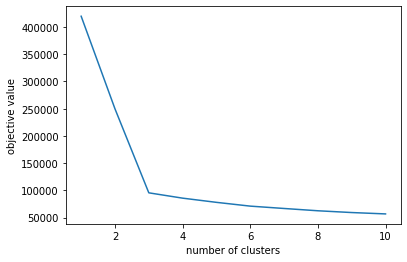

In [6]:
# Load the dataset fancy.npy. Perform k-means clustering on the dataset, 
# where k varies from 1 to 10. Plot the k-means objective value for each clustering produced 
# fancy_data = np.load('fancy.npy')
objective = []
for k in range(1,11):
    kmeans_fancy = cluster.KMeans(k) #initialize the model, using k=3 clusters.
    kmeans_fancy.fit(user_history_without_user_ID.to_numpy())
    objective.append(-kmeans_fancy.score(user_history_without_user_ID.to_numpy()))
plt.plot(range(1,11), objective)
plt.xlabel('number of clusters')  
plt.ylabel('objective value') 

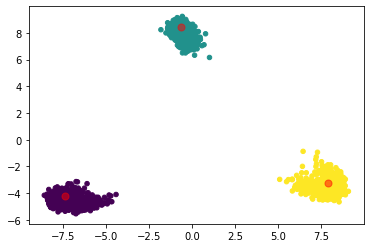

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
user_history_projected = pca.fit_transform(user_history_without_user_ID)

kmeans_user_history = cluster.KMeans(3) #initialize the model, using k=3 clusters.
kmeans_user_history.fit(user_history_without_user_ID)
centers = kmeans_user_history.cluster_centers_
centers_proj = centers @ pca.components_.T
plt.scatter(user_history_projected[:, 0], user_history_projected[:, 1], c=kmeans_user_history.labels_, s=20, cmap='viridis')
plt.scatter(centers_proj[:, 0], centers_proj[:, 1], c='red', s=50, alpha=0.5);

In [13]:
kmeans_user_history.labels_

array([1, 1, 2, ..., 1, 2, 1], dtype=int32)

In [18]:
cluster1 = np.where(kmeans_user_history.labels_ == 0)[0]
cluster2 = np.where(kmeans_user_history.labels_ == 1)[0]
cluster3 = np.where(kmeans_user_history.labels_ == 2)[0]

In [19]:
len(cluster1), len(cluster2), len(cluster3)

(1500, 1500, 1500)

In [21]:
cluster1, cluster2, cluster3

(array([   4,    7,   11, ..., 4490, 4492, 4494]),
 array([   0,    1,    3, ..., 4493, 4497, 4499]),
 array([   2,    6,   10, ..., 4495, 4496, 4498]))

In [23]:
cluster1_with_rating = cluster1[cluster1 < 3000]
cluster1_without_rating = cluster1[cluster1 >= 3000]
cluster2_with_rating = cluster2[cluster2 < 3000]
cluster2_without_rating = cluster2[cluster2 >= 3000]
cluster3_with_rating = cluster3[cluster3 < 3000]
cluster3_without_rating = cluster3[cluster3 >= 3000]
len(cluster1_with_rating), len(cluster1_without_rating), len(cluster2_with_rating), len(cluster2_without_rating), len(cluster3_with_rating), len(cluster3_without_rating)

(1009, 491, 1008, 492, 983, 517)

In [42]:
learning_rate = 0.005
k = 10
np.random.seed(42)

def initialize(n_users, n_products, k):
    """Initalize a random model, and normalize it so that it has sensible mean and variance"""
    # (The normalization helps make sure we start out at a reasonable parameter scale, which speeds up training)
    user_features = np.random.normal(size=(n_users, k))
    product_features = np.random.normal(size=(n_products, k))
    raw_predictions = predict((user_features, product_features))
    
    s = np.sqrt(2*raw_predictions.std()) # We want to start out with roughly unit variance
    b = np.sqrt((5 - raw_predictions.mean()/s)/k) #We want to start out with average rating 5
    user_features /= s
    user_features += b
    product_features /= s
    product_features += b
    
    return (user_features, product_features)

def predict(model):
    """The model's predictions for all user/product pairs"""
    user_features, product_features = model
    return user_features @ product_features.T

def single_example_step(model, user, product, rating):
    """Update the model using the gradient at a single training example"""
    user_features, product_features = model
    residual = np.dot(user_features[user], product_features[product]) - rating
    grad_users = 2 * residual * product_features[product] # the gradient for the user_features matrix
    grad_products = 2 * residual * user_features[user] # the gradient for the product_features matrix
    user_features[user] -= learning_rate*grad_users
    product_features[product] -= learning_rate*grad_products

In [85]:
from sklearn.linear_model import Ridge
user_history_without_user_ID_pca = user_history_pca

def train_sgd(cluster, model, epochs, train_ratio=0.8):
    train_and_val_user_index = cluster[cluster < 3000]
    test_user_index = cluster[cluster >= 3000]
    train_user_index = np.sort(np.random.choice(train_and_val_user_index, int(len(train_and_val_user_index)*0.8), replace=False))
    val_user_index = np.setdiff1d(train_and_val_user_index, train_user_index)
    
    train_history = user_history_without_user_ID.iloc[train_user_index]
    val_history = user_history_without_user_ID.iloc[val_user_index]
    test_history = user_history_without_user_ID.iloc[test_user_index]
    train_df = user_ratings[user_ratings['USER INDEX'].isin(train_user_index)]
    val_df = user_ratings[user_ratings['USER INDEX'].isin(val_user_index)]
    train_users = train_df['USER INDEX'].to_numpy()
    train_products = train_df['PRODUCT ID'].to_numpy()
    train_ratings = train_df['RATING'].to_numpy()
    val_users = val_df['USER INDEX'].to_numpy()
    val_products = val_df['PRODUCT ID'].to_numpy()
    val_ratings = val_df['RATING'].to_numpy()
    
    m = len(train_ratings)
    shuffle = np.random.permutation(m) 
    shuffled_users = train_users[shuffle]
    shuffled_products = train_products[shuffle]
    shuffled_ratings = train_ratings[shuffle]
    
    clf = Ridge(alpha=1.0)
    for epoch in range(epochs):
        for user, product, rating in zip(shuffled_users, shuffled_products, shuffled_ratings):
            # update the model using the gradient at a single example
            single_example_step(model, user, product, rating)
        
        clf.fit(train_history, model[0][train_user_index, :])
        val_user_features = clf.predict(val_history)
        model[0][val_user_index] = val_user_features
        # after each Epoch, we'll evaluate our model
        predicted = predict(model)
        train_loss = np.mean((train_ratings - predicted[train_users, train_products])**2)
        val_loss = np.mean((val_ratings - predicted[val_users, val_products])**2)
        print("Loss after epoch #{} is: train/{} --- val/{}".format(epoch+1, train_loss, val_loss))
    predicted_user_without_rating = clf.predict(test_history) @ (model[1].T)
    return test_user_index, predicted_user_without_rating

sgd_model = initialize(3000, 100, k)
user_without_rating_index_cluster3, predicted_cluster3 = train_sgd(cluster3, sgd_model, 40)

Loss after epoch #1 is: train/6.215220534293848 --- val/6.229362304859894
Loss after epoch #2 is: train/1.180334692407001 --- val/1.1661811354278093
Loss after epoch #3 is: train/0.48385441751734115 --- val/0.6288555808789879
Loss after epoch #4 is: train/0.4622363359279437 --- val/0.6162515670704275
Loss after epoch #5 is: train/0.45337648326394053 --- val/0.6076665031351063
Loss after epoch #6 is: train/0.44386686746492826 --- val/0.5966263443723483
Loss after epoch #7 is: train/0.43149606652390327 --- val/0.5816839478557618
Loss after epoch #8 is: train/0.41509184355290574 --- val/0.5619593102472166
Loss after epoch #9 is: train/0.39415193863814274 --- val/0.5373837267573279
Loss after epoch #10 is: train/0.36920093837949985 --- val/0.5093147714047858
Loss after epoch #11 is: train/0.3419823043799422 --- val/0.4806364277237423
Loss after epoch #12 is: train/0.3148979974028726 --- val/0.45464591009548105
Loss after epoch #13 is: train/0.2899429842520365 --- val/0.4334222960353063
Los

In [86]:
def predicted_df(user_without_rating_index_cluster, predicted_cluster):
    user_product_pairs_cluster = list(itertools.product(user_without_rating_index_cluster, np.unique(product_ID)))
    predict_cluster_df = pd.DataFrame(user_product_pairs_cluster, columns=['USER INDEX', 'PRODUCT ID'])
    predict_cluster_df['RATING'] = predicted_cluster.flatten()
    return predict_cluster_df

In [87]:
predict_cluster3_df = predicted_df(user_without_rating_index_cluster3, predicted_cluster3)
predict_cluster3_df

,USER INDEX,PRODUCT ID,RATING
0,3001,0,3.330785
1,3001,1,6.226657
2,3001,2,3.152826
3,3001,3,3.826918
4,3001,4,6.823527
5,3001,5,5.339478
6,3001,6,4.025209
7,3001,7,5.943274
8,3001,8,6.215000
9,3001,9,2.888853


In [80]:
def train_sgd_pca(cluster, model, epochs, train_ratio=0.8):
    train_and_val_user_index = cluster[cluster < 3000]
    test_user_index = cluster[cluster >= 3000]
    train_user_index = np.sort(np.random.choice(train_and_val_user_index, int(len(train_and_val_user_index)*0.8), replace=False))
    val_user_index = np.setdiff1d(train_and_val_user_index, train_user_index)
    
    train_history = user_history_without_user_ID_pca.iloc[train_user_index]
    val_history = user_history_without_user_ID_pca.iloc[val_user_index]
    test_history = user_history_without_user_ID_pca.iloc[test_user_index]
    train_df = user_ratings[user_ratings['USER INDEX'].isin(train_user_index)]
    val_df = user_ratings[user_ratings['USER INDEX'].isin(val_user_index)]
    train_users = train_df['USER INDEX'].to_numpy()
    train_products = train_df['PRODUCT ID'].to_numpy()
    train_ratings = train_df['RATING'].to_numpy()
    val_users = val_df['USER INDEX'].to_numpy()
    val_products = val_df['PRODUCT ID'].to_numpy()
    val_ratings = val_df['RATING'].to_numpy()
    
    m = len(train_ratings)
    shuffle = np.random.permutation(m) 
    shuffled_users = train_users[shuffle]
    shuffled_products = train_products[shuffle]
    shuffled_ratings = train_ratings[shuffle]
    
    clf = Ridge(alpha=1.0)
    for epoch in range(epochs):
        for user, product, rating in zip(shuffled_users, shuffled_products, shuffled_ratings):
            # update the model using the gradient at a single example
            single_example_step(model, user, product, rating)
        
        clf.fit(train_history, model[0][train_user_index, :])
        val_user_features = clf.predict(val_history)
        model[0][val_user_index] = val_user_features
        # after each Epoch, we'll evaluate our model
        predicted = predict(model)
        train_loss = np.mean((train_ratings - predicted[train_users, train_products])**2)
        val_loss = np.mean((val_ratings - predicted[val_users, val_products])**2)
        print("Loss after epoch #{} is: train/{} --- val/{}".format(epoch+1, train_loss, val_loss))
    predicted_user_without_rating = clf.predict(test_history) @ (model[1].T)
    return test_user_index, predicted_user_without_rating

In [90]:
sgd_model = initialize(3000, 100, k)
user_without_rating_index_cluster1, predicted_cluster1 = train_sgd_pca(cluster1, sgd_model, 10)

Loss after epoch #1 is: train/5.328597476887359 --- val/7.048313983322707
Loss after epoch #2 is: train/0.6226749869243771 --- val/6.992600101421615
Loss after epoch #3 is: train/0.4430672188483263 --- val/6.9851997804369805
Loss after epoch #4 is: train/0.43167896983312826 --- val/6.984601786674899
Loss after epoch #5 is: train/0.42510780186621044 --- val/6.9844346451228985
Loss after epoch #6 is: train/0.4180428954777747 --- val/6.984265347837406
Loss after epoch #7 is: train/0.4091573587854241 --- val/6.984090309727181
Loss after epoch #8 is: train/0.39778506455842755 --- val/6.983913400680757
Loss after epoch #9 is: train/0.383663481246033 --- val/6.983743045505565
Loss after epoch #10 is: train/0.3670020250595399 --- val/6.983598179444634


In [84]:
sgd_model = initialize(3000, 100, k)
user_without_rating_index_cluster2, predicted_cluster2 = train_sgd_pca(cluster2, sgd_model, 10)

Loss after epoch #1 is: train/5.709985525380818 --- val/7.820627882567211
Loss after epoch #2 is: train/0.647658225285796 --- val/7.555584370636254
Loss after epoch #3 is: train/0.4524127586541538 --- val/7.545722338269292
Loss after epoch #4 is: train/0.44094067966490436 --- val/7.544696244812609
Loss after epoch #5 is: train/0.43571307271675197 --- val/7.544455550841523
Loss after epoch #6 is: train/0.43083961129892373 --- val/7.54459440880066
Loss after epoch #7 is: train/0.4250569802895325 --- val/7.5449743650066035
Loss after epoch #8 is: train/0.4177703366162975 --- val/7.545542834913521
Loss after epoch #9 is: train/0.40863053903990365 --- val/7.546281921300779
Loss after epoch #10 is: train/0.3974847297864976 --- val/7.547181568603309


In [92]:
predict_cluster1_df = predicted_df(user_without_rating_index_cluster1, predicted_cluster1)
predict_cluster2_df = predicted_df(user_without_rating_index_cluster2, predicted_cluster2)

In [59]:
user_list = user_ratings['USER INDEX'].to_numpy()
product_list = user_ratings['PRODUCT ID'].to_numpy()
rating_list = user_ratings['RATING'].to_numpy()
length = len(user_list)
print(length)
shuffle_list = np.random.permutation(length) 
shuffled_user_list = user_list[shuffle_list]
shuffled_product_list = product_list[shuffle_list]
shuffled_rating_list = rating_list[shuffle_list]

150062


In [60]:
train_size = int(length*0.8)
train_user_list = shuffled_user_list[:train_size]
train_product_list = shuffled_product_list[:train_size]
train_rating_list = shuffled_rating_list[:train_size]
val_user_list = shuffled_user_list[train_size:]
val_product_list = shuffled_product_list[train_size:]
val_rating_list = shuffled_rating_list[train_size:]

In [63]:
def train_user_with_rating_sgd(model, epochs):
    """Train the model for a number of epochs via SGD (batch size=1)"""
    user_features, product_features = model
    for epoch in range(epochs):
        for user, product, rating in zip(shuffled_user_list, shuffled_product_list, shuffled_rating_list):
            # update the model using the gradient at a single example
            single_example_step(model, user, product, rating)
        # after each Epoch, we'll evaluate our model
        predicted = predict(model)
        train_loss = np.mean((train_rating_list - predicted[train_user_list, train_product_list])**2)
        val_loss = np.mean((val_rating_list - predicted[val_user_list, val_product_list])**2)
        print("Loss after epoch #{} is: train/{} --- val/{}".format(epoch+1, train_loss, val_loss))
    return model

sgd_user_with_rating_model = initialize(3000, 100, 10)
user_with_rating_model = train_user_with_rating_sgd(sgd_user_with_rating_model, 10)

Loss after epoch #1 is: train/6.644907348901207 --- val/6.065555679232195
Loss after epoch #2 is: train/2.371797193388029 --- val/1.8574403337292849
Loss after epoch #3 is: train/0.6173384043269223 --- val/0.4363995397310974
Loss after epoch #4 is: train/0.4199209488479145 --- val/0.2915254984077441
Loss after epoch #5 is: train/0.402999897201341 --- val/0.2799247128851599
Loss after epoch #6 is: train/0.4003897147756469 --- val/0.2790323140658851
Loss after epoch #7 is: train/0.39913747012983136 --- val/0.27925140020782524
Loss after epoch #8 is: train/0.39799190837740683 --- val/0.2795654376389341
Loss after epoch #9 is: train/0.39679482820296674 --- val/0.279816349743626
Loss after epoch #10 is: train/0.3955020962305388 --- val/0.2799558875865867


In [68]:
predicted_user_with_rating = predict(user_with_rating_model)

In [98]:
user_product_pairs = list(itertools.product(range(3000), np.unique(product_ID)))
submission = pd.DataFrame(user_product_pairs, columns=['USER INDEX', 'PRODUCT ID'])
submission['RATING'] = predicted_user_with_rating.flatten()
# submission = submission.drop(['NEW USER ID', 'PRODUCT ID'], axis=1)
submission

,USER INDEX,PRODUCT ID,RATING
0,0,0,3.184886
1,0,1,7.552181
2,0,2,3.336659
3,0,3,6.888363
4,0,4,2.723812
5,0,5,3.824653
6,0,6,4.015964
7,0,7,6.268129
8,0,8,7.215219
9,0,9,2.463699


In [73]:
user_ratings

,USER ID,PRODUCT,RATING,USER INDEX,PRODUCT ID
0,100953,spray karma,3,0,80
1,100953,nurse october,5,0,55
2,100953,balance hostel,3,0,6
3,100953,volume pasta,3,0,98
4,100953,diana chariot,6,0,19
5,100953,mineral barcode,7,0,49
6,100953,cinema complex,6,0,13
7,100953,siren junior,7,0,78
8,100953,harbor moral,7,0,33
9,100953,cipher empty,7,0,14


In [99]:
submission = submission.set_index(['USER INDEX', 'PRODUCT ID'])
user_ratings = user_ratings.set_index(['USER INDEX', 'PRODUCT ID'])
submission.update(user_ratings)
submission.reset_index(inplace=True)
user_ratings.reset_index(inplace=True)
submission

,USER INDEX,PRODUCT ID,RATING
0,0,0,2.000000
1,0,1,7.552181
2,0,2,4.000000
3,0,3,6.000000
4,0,4,3.000000
5,0,5,4.000000
6,0,6,3.000000
7,0,7,6.268129
8,0,8,8.000000
9,0,9,2.000000


In [100]:
sub = pd.concat([submission, predict_cluster1_df, predict_cluster2_df, predict_cluster3_df])
sub['USER ID'] = le_user.inverse_transform(sub['USER INDEX'])
sub['PRODUCT'] = le_product.inverse_transform(sub['PRODUCT ID'])
sub

,USER INDEX,PRODUCT ID,RATING,USER ID,PRODUCT
0,0,0,2.000000,100953,alaska basil
1,0,1,7.552181,100953,alcohol future
2,0,2,4.000000,100953,alice ticket
3,0,3,6.000000,100953,alien potato
4,0,4,3.000000,100953,asia jacket
5,0,5,4.000000,100953,aztec iris
6,0,6,3.000000,100953,balance hostel
7,0,7,6.268129,100953,betty today
8,0,8,8.000000,100953,boston house
9,0,9,2.000000,100953,bronze sweden


In [102]:
sub = sub.sort_values(by='USER ID', ascending=1)

In [105]:
sub = sub.drop(['USER INDEX', 'PRODUCT ID'],axis=1)

In [114]:
cols = sub.columns.tolist()
cols = cols[1:] + cols[0:1]
sub = sub[cols]

In [118]:
sub = sub.drop(['index'], axis=1)

,USER ID,PRODUCT,RATING
0,100953,alaska basil,2.000000
1,100953,serial organic,5.203766
2,100953,senator ozone,5.254295
3,100953,segment meter,5.668025
4,100953,season arthur,7.000000
5,100953,scale phone,7.000000
6,100953,salon pulse,3.611760
7,100953,saint texas,6.511304
8,100953,sabine emotion,5.000000
9,100953,rider shine,6.000000


In [119]:
sub.to_csv('submission.csv')

In [121]:
sub['RATING'].round(0).astype('int32')

0         2
1         5
2         5
3         6
4         7
5         7
6         4
7         7
8         5
9         6
10        5
11        6
12        7
13        4
14        5
15        7
16        4
17        2
18        5
19        3
20        4
21        7
22        6
23        5
24        4
25        6
26        5
27        3
28        4
29        2
         ..
449970    5
449971    5
449972    5
449973    5
449974    5
449975    5
449976    5
449977    5
449978    5
449979    5
449980    5
449981    5
449982    5
449983    5
449984    5
449985    5
449986    5
449987    5
449988    6
449989    5
449990    5
449991    5
449992    5
449993    5
449994    5
449995    5
449996    5
449997    5
449998    5
449999    5
Name: RATING, Length: 450000, dtype: int32

In [123]:
sub['RATING'] = sub['RATING'].round(0).astype('int32')

,USER ID,PRODUCT,RATING
0,100953,alaska basil,2
1,100953,serial organic,5
2,100953,senator ozone,5
3,100953,segment meter,6
4,100953,season arthur,7
5,100953,scale phone,7
6,100953,salon pulse,4
7,100953,saint texas,7
8,100953,sabine emotion,5
9,100953,rider shine,6


In [124]:
sub.to_csv('submission_int.csv')